In [1]:
from lgca import get_lgca
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
path = 'raw_configs/large_param_scan/'
path = '/mnt/data/simon/friedl_paper_raw_data/friedl_project/draft2/isotropic_ecm/'
path = '/home/simon/PycharmProjects/biolgca/raw_configs/isotropic_ecm/'
params = np.load(path+'parameters.npz')
betas = params['betas']
ecms = params['alphas']
l_spheroid = params['l_spheroid']
lb = len(betas)
lecm = len(ecms)
observables = np.load(path+'observables.npz')
glob_speed = observables['glob_speed']
loc_speed = observables['loc_speed']
correlations = observables['correlations']
vorticity = observables ['vorticity']
single_cells = observables['single_cells']

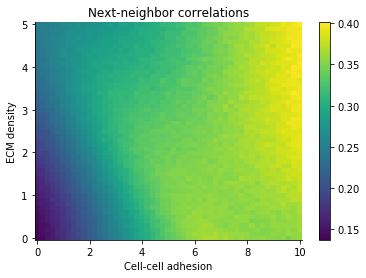

In [2]:
%matplotlib inline
path = 'smbfigures/'
dbeta = betas[1] - betas[0]
decm = ecms[1] - ecms[0]
x = np.linspace(betas.min() - dbeta/2, betas.max() + dbeta/2, len(betas)+1)
y = np.linspace(ecms.min() - decm/2, ecms.max() + decm/2, len(ecms)+1)
#plt.imshow(corrs.T, origin='lower')
#plt.contourf(betas, ecms, corrs.T)
plt.title('Next-neighbor correlations')
plt.xlabel('Cell-cell adhesion')
plt.ylabel('ECM density')
plt.pcolormesh(x, y, correlations.T)
plt.colorbar()
#plt.savefig(path+'correlations.png', dpi=600)

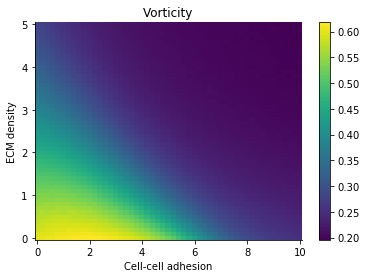

In [3]:
#plt.contourf(betas, ecms, vorticity.T)
plt.pcolormesh(x, y, vorticity.T)
plt.title('Vorticity')
plt.xlabel('Cell-cell adhesion')
plt.ylabel('ECM density')
plt.colorbar()

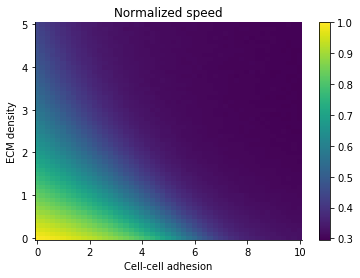

In [4]:
#plt.contour(betas, ecms, glob_speed.T/glob_speed.max(), cmap='Reds')
plt.pcolormesh(x, y, loc_speed.T/loc_speed.max())
plt.title('Normalized speed')
plt.xlabel('Cell-cell adhesion')
plt.ylabel('ECM density')
plt.colorbar()

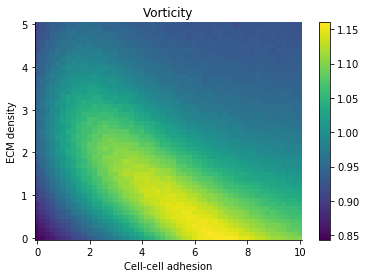

In [5]:
plt.pcolormesh(x, y, vorticity.T/loc_speed.T)
plt.title('Regularized vorticity')
plt.xlabel('Cell-cell adhesion')
plt.ylabel('ECM density')
plt.colorbar()

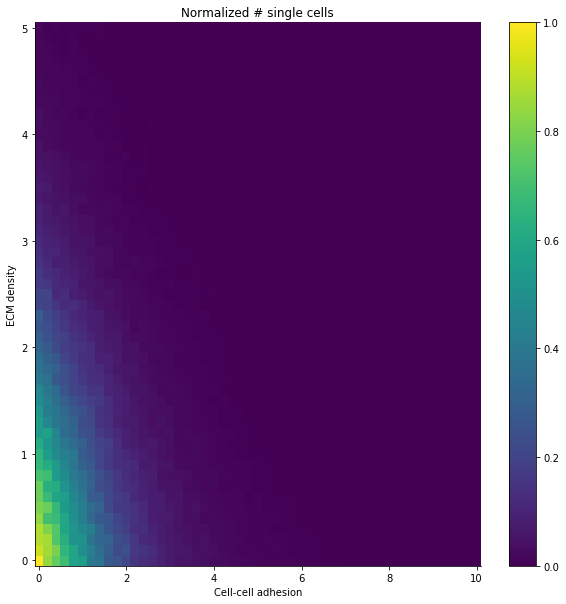

In [6]:
#plt.contourf(betas, ecms, single_cells.T/single_cells.max())
plt.figure(figsize=(10, 10))
plt.pcolormesh(x, y, single_cells.T/single_cells.max())
plt.title('Normalized # single cells')
plt.xlabel('Cell-cell adhesion')
plt.ylabel('ECM density')
plt.colorbar()
#plt.savefig(path+'single_cells.png', dpi=600)

In [13]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cutoff2 = -1
cutoff1 = 1
X, Y = np.meshgrid(1/ecms[cutoff1:cutoff2], 1/betas[cutoff1:cutoff2])
cmap = plt.get_cmap()

In [8]:
from scipy.ndimage.filters import gaussian_filter
sigma = 2
filtered_corrs = gaussian_filter(correlations, sigma)
filtered_scs = gaussian_filter(single_cells, sigma)
corrplot = filtered_corrs[cutoff1:cutoff2, cutoff1:cutoff2]
clrsplot = filtered_scs[cutoff1:cutoff2, cutoff1:cutoff2]
scsmax = clrsplot.max()
print(X.shape, Y.shape, corrplot.shape, clrsplot.shape)
print(ecms)

(49, 49) (49, 49) (49, 49) (49, 49)
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]


<IPython.core.display.Javascript object>


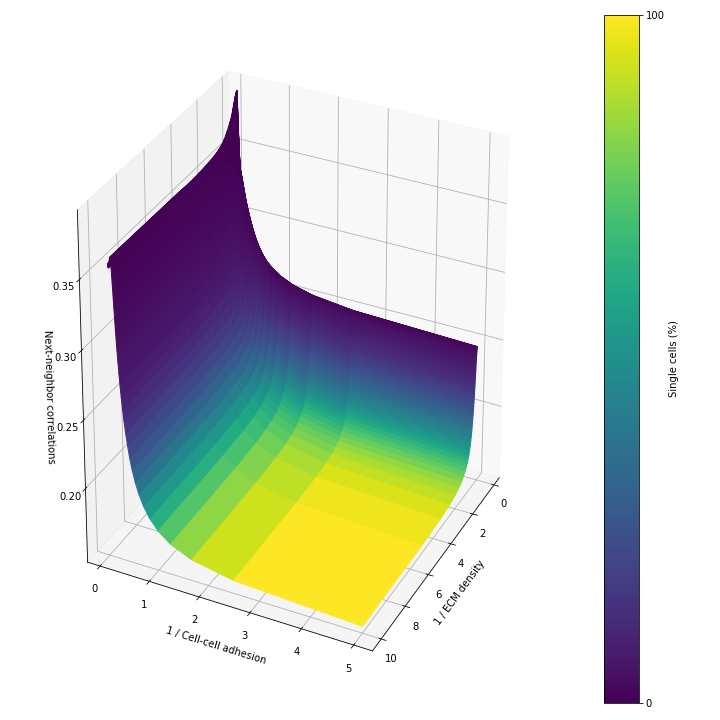

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, corrplot, facecolors=cmap(clrsplot/scsmax), antialiased=True,
                shade=False, rstride=1, cstride=1)
ax.set_xlabel('1 / ECM density')
ax.set_ylabel('1 / Cell-cell adhesion')
ax.set_zlabel('Next-neighbor correlations')
m = cm.ScalarMappable(cmap=cm.viridis)
m.set_array(single_cells[cutoff1:cutoff2, cutoff1:cutoff2]/single_cells[cutoff1:cutoff2, cutoff1:cutoff2].max())
cbar = plt.colorbar(m)
cbar.ax.get_yaxis().set_ticks([0., 1.])
cbar.ax.get_yaxis().set_ticklabels([0, 100])
cbar.ax.set_ylabel('Single cells (%)')
ax.view_init(30, 50)
plt.tight_layout()
#plt.savefig(path+'3dphasediagram.svg')

<IPython.core.display.Javascript object>


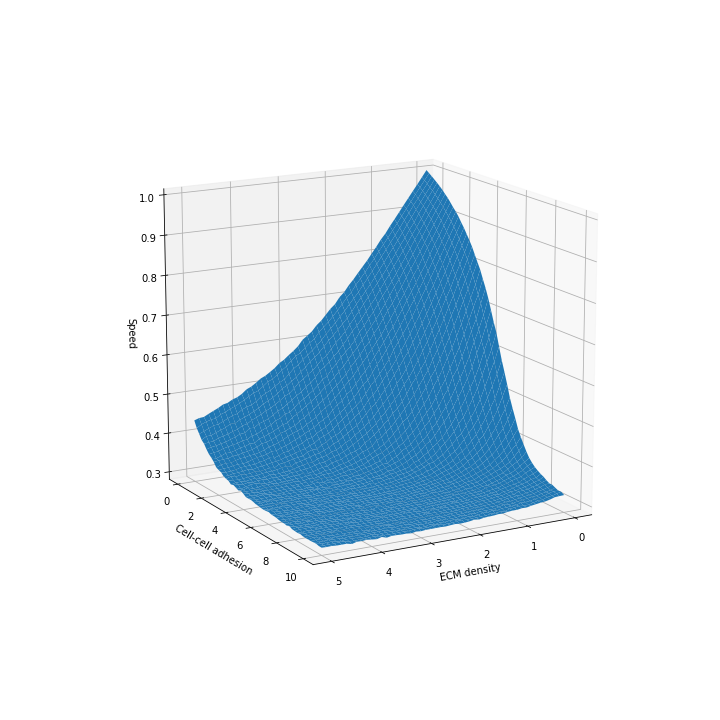

Text(0.5, 0, 'Speed')

In [15]:
X, Y = np.meshgrid(ecms, betas)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, loc_speed/loc_speed.max(), antialiased=True,
                shade=False, rstride=1, cstride=1)
ax.set_xlabel('ECM density')
ax.set_ylabel('Cell-cell adhesion')
ax.set_zlabel('Speed')